In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import moscot
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/home/icb/dominik.klein/miniconda3/envs/moscot_env/lib/python3.9/site-packages/docrep/decorators.py:43: SyntaxWarning: 'dataset.parameters' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [3]:
from moscot.problems.generic import SinkhornProblem, GWProblem, FGWProblem

# Prepare the data

In [4]:
adata_2019 = sc.read("/storage/groups/ml01/workspace/dominik.klein/pancreas_2019/GSE132188_adata.h5ad.h5")

/home/icb/dominik.klein/miniconda3/envs/moscot_env/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [5]:
adata_2019

AnnData object with n_obs × n_vars = 36351 × 17327
    obs: 'day', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'proliferation', 'G2M_score', 'S_score', 'clusters_fig3_final', 'clusters_fig3_final_noep', 'clusters_fig4_final', 'clusters_fig2_final', 'clusters_fig6_broad_final', 'clusters_fig6_fine_final', 'clusters_fig6_alpha_final'
    var: 'n_cells', 'highly_variable_genes', 'expression_mean', 'dispersion'
    uns: 'Ngn3+_colors', 'PCs_loading_hvg', 'clusters_fig2_final_colors', 'clusters_fig3_final_colors', 'clusters_fig3_final_noep_colors', 'clusters_fig4_final_colors', 'clusters_fig6_alpha_final_colors', 'clusters_fig6_broad_final_colors', 'clusters_fig6_fine_final_colors', 'day_colors', 'neighbors', 'pca', 'proliferation_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [6]:
adata_2022 = sc.read("/storage/groups/ml01/workspace/dominik.klein/scMultiome_NVF/scMultiome_NVF_E14-E15/E14-E15_adata_filtered_rmDoublets_sctNormalized_WNN_embedded_initialAnno.h5ad")

In [7]:
adata_2019_clusters = adata_2019.obs[["clusters_fig3_final", "clusters_fig3_final_noep", "clusters_fig4_final", "clusters_fig2_final", "clusters_fig6_broad_final", "clusters_fig6_fine_final", "clusters_fig6_alpha_final"]]

In [8]:
adata_2019_clusters.apply(lambda x: x.value_counts())

,clusters_fig3_final,clusters_fig3_final_noep,clusters_fig4_final,clusters_fig2_final,clusters_fig6_broad_final,clusters_fig6_fine_final,clusters_fig6_alpha_final
Acinar,NaN,NaN,NaN,10432.0,NaN,10432.0,NaN
Alpha,NaN,NaN,NaN,NaN,1428.0,1428.0,NaN
Beta,NaN,NaN,NaN,NaN,1237.0,1237.0,1237.0
Delta,NaN,NaN,NaN,NaN,103.0,103.0,103.0
Ductal,4268.0,5755.0,NaN,6575.0,4268.0,6575.0,6575.0
Ductal Bipotent,NaN,NaN,6575.0,NaN,NaN,NaN,NaN
EP,NaN,NaN,NaN,5119.0,NaN,NaN,NaN
Endocrine,2999.0,2999.0,NaN,2999.0,NaN,NaN,NaN
Epsilon,NaN,NaN,NaN,NaN,231.0,231.0,231.0
Excluded,NaN,NaN,22599.0,NaN,NaN,NaN,NaN


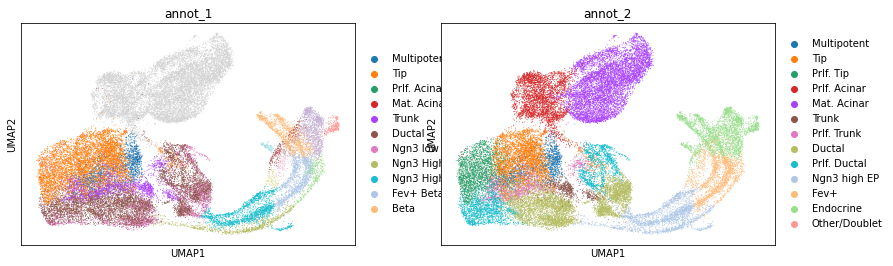

In [9]:
adata_2019.obs["annot_1"] = adata_2019.obs["clusters_fig6_alpha_final"].copy()
adata_2019.obs["annot_2"] = adata_2019.obs["clusters_fig3_final_noep"].copy()
sc.pl.umap(adata_2019, color=["annot_1", "annot_2"])

In [10]:
adata_2019.obs["celltype"] = np.where(~pd.isnull(adata_2019.obs["annot_1"]), adata_2019.obs["annot_1"], adata_2019.obs["annot_2"])

In [11]:
pd.isnull(adata_2019.obs["celltype"]).sum()

0

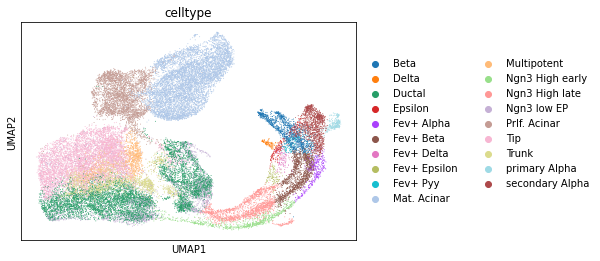

In [12]:
sc.pl.umap(adata_2019, color=["celltype"])

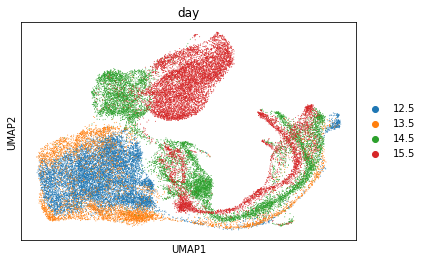

In [13]:
sc.pl.umap(adata_2019, color=["day"])

In [11]:
adata_145 = adata_2019[adata_2019.obs["day"]=="14.5"].concatenate(adata_2022[adata_2022.obs["sample"]=="E14.5"], join="outer")

/home/icb/dominik.klein/miniconda3/envs/moscot_env/lib/python3.9/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env/lib/python3.9/site-packages/anndata/_core/merge.py:942: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape)

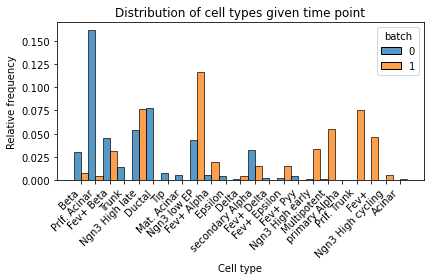

In [15]:

sns.histplot(data=adata_145.obs, x="celltype", hue="batch", multiple='dodge', stat = 'probability')
plt.xlabel("Cell type")
plt.ylabel("Relative frequency")
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of cell types given time point")
plt.tight_layout()

In [16]:
# we see that 2019 dataset corresponds to adata.obs["batch"]=0
adata_145.obs[["batch", "day"]]


,batch,day
AAACCTGAGATCCCGC-1-2-0,0,14.5
AAACCTGAGCAGGTCA-1-2-0,0,14.5
AAACCTGCAATGAATG-1-2-0,0,14.5
AAACCTGCAATTGCTG-1-2-0,0,14.5
AAACCTGCACAGAGGT-1-2-0,0,14.5
...,...,...
TTTGTTGGTAATCCCT-1-0-1,1,NaN
TTTGTTGGTAGTTAAC-1-0-1,1,NaN
TTTGTTGGTATTGGAT-1-0-1,1,NaN
TTTGTTGGTCTAACAG-1-0-1,1,NaN


In [12]:
adata_135 = adata_2019[adata_2019.obs["day"]=="13.5"].concatenate(adata_2022[adata_2022.obs["sample"]=="E13.5"], join="outer")

In [17]:
adata_145.obs["batch"].value_counts()

1    9852
0    9633
Name: batch, dtype: int64

In [13]:
sc.tl.pca(adata_145, n_comps=30)

In [14]:
sp = SinkhornProblem(adata_145)
sp = sp.prepare(key = "batch", joint_attr = "X_pca")

In [15]:
sp.solve(scale_cost="mean", tau_a=0.9, tau_b=0.9, epsilon=1e-2)

2022-06-16 08:49:17.650776: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-16 08:49:17.650870: W external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


In [16]:
adata_145.obs["celltype"] = adata_145.obs["celltype"].astype("category")

In [17]:
tm = sp._cell_transition("batch", "0", "1", "celltype", "leiden", forward=False) 
#forward=False as we map cells of kunknown cell type to cells with known cell type

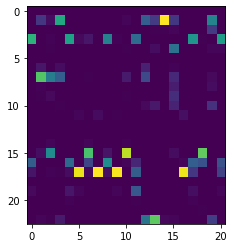

In [18]:
plt.imshow(tm)

In [19]:
tm

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Acinar,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Beta,5.404902e-05,1.534579e-01,0.032368,5.892779e-01,3.293276e-07,6.253059e-05,1.890298e-03,1.133934e-12,2.104228e-05,3.308878e-10,...,1.227541e-08,2.908181e-01,1.644734e-01,9.729508e-01,1.559063e-01,2.016766e-07,9.721189e-06,2.966877e-03,4.370571e-01,2.165286e-03
Delta,8.465179e-07,3.883082e-04,0.000736,2.261300e-03,1.352912e-08,2.704983e-06,1.582729e-04,3.353628e-11,1.513436e-05,1.264500e-10,...,3.145502e-09,2.033987e-03,4.946364e-03,4.947865e-03,1.357009e-02,1.726126e-09,7.154509e-07,1.012338e-07,1.656518e-01,2.482478e-04
Ductal,6.298434e-01,8.836611e-04,0.008238,2.295865e-04,5.627341e-01,2.290857e-02,5.743442e-02,1.064770e-04,4.258221e-01,1.099382e-02,...,3.388100e-01,4.953628e-07,1.641428e-07,1.291229e-11,6.445148e-08,1.910294e-05,5.073500e-01,4.016977e-03,5.230326e-12,5.401373e-01
Epsilon,8.563457e-06,2.115863e-03,0.005511,2.551967e-04,4.984449e-07,1.347616e-04,2.576067e-03,2.674295e-10,1.215265e-04,1.860187e-08,...,1.952044e-07,2.221011e-03,3.224697e-02,9.469034e-05,3.641194e-01,1.438108e-07,7.571213e-06,2.347986e-06,1.649654e-02,1.203806e-02
Fev+,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Fev+ Alpha,7.830902e-06,5.924042e-02,0.002438,3.405102e-02,4.494433e-11,2.578730e-07,1.002805e-05,1.332776e-16,1.157302e-07,3.528187e-14,...,1.162350e-11,8.818014e-02,4.675268e-05,3.783208e-06,7.623310e-03,3.728558e-13,1.164583e-09,4.349652e-05,3.516461e-03,1.923540e-08
Fev+ Beta,7.690045e-05,7.115918e-01,0.411430,2.898000e-01,5.969116e-09,8.298657e-06,4.247928e-03,1.058614e-12,4.675251e-06,5.802295e-11,...,2.334171e-09,2.158028e-01,7.699286e-04,8.978404e-04,1.124360e-01,7.849082e-10,1.959302e-07,7.741338e-04,2.489608e-02,3.692325e-06
Fev+ Delta,3.436060e-07,8.978504e-03,0.001993,2.106077e-03,1.677118e-09,4.990780e-07,4.581595e-05,3.178087e-15,1.622453e-06,1.226680e-12,...,1.122250e-10,1.168658e-03,5.391587e-05,5.371529e-05,7.479914e-02,1.957271e-12,2.049349e-08,5.745100e-06,3.293949e-02,4.537990e-07
Fev+ Epsilon,5.052410e-09,6.827343e-03,0.024181,2.906384e-05,7.406303e-10,1.848189e-09,1.613592e-04,1.029426e-16,3.025030e-08,1.915999e-14,...,1.073271e-12,2.639135e-05,2.429509e-08,1.702045e-10,1.262924e-01,3.359079e-15,9.409893e-10,3.100461e-06,4.175850e-05,1.724103e-09


In [20]:
top_k = 6
tmp=tm.index[np.argsort(tm.values, axis=0)[-top_k:, :]]

/tmp/ipykernel_201748/2771736252.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  tmp=tm.index[np.argsort(tm.values, axis=0)[-top_k:, :]]


In [26]:
tmp

array([['Ngn3 High late', 'Fev+ Delta', 'Prlf. Acinar', 'Fev+ Pyy',
        'Ngn3 High late', 'Trunk', 'Fev+ Beta', 'Ngn3 low EP', 'Trunk',
        'Trunk', 'Epsilon', 'Mat. Acinar', 'Epsilon', 'Fev+ Beta',
        'Epsilon', 'Fev+ Delta', 'secondary Alpha', 'Ngn3 High late',
        'Prlf. Acinar', 'Fev+ Beta', 'Beta'],
       ['Trunk', 'secondary Alpha', 'Ngn3 High early', 'Prlf. Acinar',
        'Trunk', 'Ngn3 low EP', 'Ngn3 High early', 'Trunk', 'Tip',
        'Ngn3 low EP', 'Ngn3 High early', 'Trunk', 'Fev+ Pyy', 'Delta',
        'Fev+ Pyy', 'Fev+ Pyy', 'Ductal', 'Trunk', 'Beta', 'Fev+ Delta',
        'Epsilon'],
       ['Tip', 'Ngn3 High late', 'Fev+ Epsilon', 'Fev+ Alpha',
        'Prlf. Acinar', 'Tip', 'Prlf. Acinar', 'Ductal', 'Prlf. Acinar',
        'Mat. Acinar', 'Ngn3 low EP', 'Ngn3 low EP', 'Fev+ Alpha',
        'Epsilon', 'Fev+ Beta', 'Fev+ Beta', 'Tip', 'Tip', 'Ductal',
        'Fev+ Pyy', 'Tip'],
       ['Prlf. Acinar', 'Fev+ Alpha', 'Beta', 'secondary Alpha', 'Tip',
  

In [31]:
dd = {}
for k in range(top_k):
    dd[k] = {tm.columns.values[i]: tmp[k,i] for i in range(len(tm.columns.values))}

In [32]:
dd

{0: {'0': 'Ngn3 High late',
  '1': 'Fev+ Delta',
  '2': 'Prlf. Acinar',
  '3': 'Fev+ Pyy',
  '4': 'Ngn3 High late',
  '5': 'Trunk',
  '6': 'Fev+ Beta',
  '7': 'Ngn3 low EP',
  '8': 'Trunk',
  '9': 'Trunk',
  '10': 'Epsilon',
  '11': 'Mat. Acinar',
  '12': 'Epsilon',
  '13': 'Fev+ Beta',
  '14': 'Epsilon',
  '15': 'Fev+ Delta',
  '16': 'secondary Alpha',
  '17': 'Ngn3 High late',
  '18': 'Prlf. Acinar',
  '19': 'Fev+ Beta',
  '20': 'Beta'},
 1: {'0': 'Trunk',
  '1': 'secondary Alpha',
  '2': 'Ngn3 High early',
  '3': 'Prlf. Acinar',
  '4': 'Trunk',
  '5': 'Ngn3 low EP',
  '6': 'Ngn3 High early',
  '7': 'Trunk',
  '8': 'Tip',
  '9': 'Ngn3 low EP',
  '10': 'Ngn3 High early',
  '11': 'Trunk',
  '12': 'Fev+ Pyy',
  '13': 'Delta',
  '14': 'Fev+ Pyy',
  '15': 'Fev+ Pyy',
  '16': 'Ductal',
  '17': 'Trunk',
  '18': 'Beta',
  '19': 'Fev+ Delta',
  '20': 'Epsilon'},
 2: {'0': 'Tip',
  '1': 'Ngn3 High late',
  '2': 'Fev+ Epsilon',
  '3': 'Fev+ Alpha',
  '4': 'Prlf. Acinar',
  '5': 'Tip',
  '6': 'P

In [23]:
tm.loc["Ngn3 High late", "0"]

0.00034633443025880814

In [33]:
d_2 = {}
for k, d in dd.items():
    ls = []
    for col, ind in d.items():
        print(col, ind)
        ls.append(tm.loc[ind, col])
    d_2[k] = ls

0 Ngn3 High late
1 Fev+ Delta
2 Prlf. Acinar
3 Fev+ Pyy
4 Ngn3 High late
5 Trunk
6 Fev+ Beta
7 Ngn3 low EP
8 Trunk
9 Trunk
10 Epsilon
11 Mat. Acinar
12 Epsilon
13 Fev+ Beta
14 Epsilon
15 Fev+ Delta
16 secondary Alpha
17 Ngn3 High late
18 Prlf. Acinar
19 Fev+ Beta
20 Beta
0 Trunk
1 secondary Alpha
2 Ngn3 High early
3 Prlf. Acinar
4 Trunk
5 Ngn3 low EP
6 Ngn3 High early
7 Trunk
8 Tip
9 Ngn3 low EP
10 Ngn3 High early
11 Trunk
12 Fev+ Pyy
13 Delta
14 Fev+ Pyy
15 Fev+ Pyy
16 Ductal
17 Trunk
18 Beta
19 Fev+ Delta
20 Epsilon
0 Tip
1 Ngn3 High late
2 Fev+ Epsilon
3 Fev+ Alpha
4 Prlf. Acinar
5 Tip
6 Prlf. Acinar
7 Ductal
8 Prlf. Acinar
9 Mat. Acinar
10 Ngn3 low EP
11 Ngn3 low EP
12 Fev+ Alpha
13 Epsilon
14 Fev+ Beta
15 Fev+ Beta
16 Tip
17 Tip
18 Ductal
19 Fev+ Pyy
20 Tip
0 Prlf. Acinar
1 Fev+ Alpha
2 Beta
3 secondary Alpha
4 Tip
5 Mat. Acinar
6 Ductal
7 Tip
8 Ngn3 High late
9 Ductal
10 Beta
11 Tip
12 Fev+ Beta
13 Fev+ Pyy
14 Delta
15 Fev+ Epsilon
16 Ngn3 low EP
17 Prlf. Acinar
18 primary Alpha


In [34]:
d_2

{0: [0.00034633443025880814,
  0.008978503935756289,
  0.009318912778138759,
  0.004894029296592702,
  2.343253438400275e-05,
  0.0008966002066318922,
  0.004247927861881055,
  1.8429643775349177e-05,
  0.0030642726216138162,
  0.0021466085252032233,
  0.004249015173252458,
  0.00010855019895269969,
  0.0022210108041524125,
  0.0007699286083476439,
  9.469034042931883e-05,
  0.07479914099544407,
  8.565956700031375e-07,
  0.0014972539373908568,
  0.0017877494415294165,
  0.024896076147549503,
  0.0021652858838115546],
 1: [0.003502910634806994,
  0.013221561486318752,
  0.01520491766678787,
  0.0073666290254539215,
  0.01038226673953627,
  0.005283570657199036,
  0.01345658822385408,
  4.1572505334630506e-05,
  0.0035483738173816394,
  0.0025818089961370445,
  0.008701966905907996,
  0.0060781478886167625,
  0.023437028673048654,
  0.004946363791082721,
  0.0003244960364643244,
  0.09197734569323195,
  1.9102940439761233e-05,
  0.00823678124194292,
  0.0029668773650257264,
  0.03293948

In [36]:
pd.DataFrame.from_dict(dd)

,0,1,2,3,4,5
0,Ngn3 High late,Trunk,Tip,Prlf. Acinar,Ngn3 low EP,Ductal
1,Fev+ Delta,secondary Alpha,Ngn3 High late,Fev+ Alpha,Beta,Fev+ Beta
2,Prlf. Acinar,Ngn3 High early,Fev+ Epsilon,Beta,Fev+ Beta,Ngn3 High late
3,Fev+ Pyy,Prlf. Acinar,Fev+ Alpha,secondary Alpha,Fev+ Beta,Beta
4,Ngn3 High late,Trunk,Prlf. Acinar,Tip,Ngn3 low EP,Ductal
5,Trunk,Ngn3 low EP,Tip,Mat. Acinar,Ductal,Prlf. Acinar
6,Fev+ Beta,Ngn3 High early,Prlf. Acinar,Ductal,Ngn3 low EP,Ngn3 High late
7,Ngn3 low EP,Trunk,Ductal,Tip,Mat. Acinar,Prlf. Acinar
8,Trunk,Tip,Prlf. Acinar,Ngn3 High late,Ductal,Ngn3 low EP
9,Trunk,Ngn3 low EP,Mat. Acinar,Ductal,Tip,Prlf. Acinar


In [35]:
pd.DataFrame.from_dict(d_2)

,0,1,2,3,4,5
0,3.463344e-04,0.003503,0.025316,0.054527,0.286129,0.629843
1,8.978504e-03,0.013222,0.035714,0.059240,0.153458,0.711592
2,9.318913e-03,0.015205,0.024181,0.032368,0.411430,0.474047
3,4.894029e-03,0.007367,0.034051,0.069174,0.289800,0.589278
4,2.343253e-05,0.010382,0.033703,0.060276,0.332839,0.562734
5,8.966002e-04,0.005284,0.011423,0.015138,0.022909,0.943682
6,4.247928e-03,0.013457,0.021269,0.057434,0.202545,0.693966
7,1.842964e-05,0.000042,0.000106,0.000938,0.028256,0.970637
8,3.064273e-03,0.003548,0.039346,0.051947,0.425822,0.475062
9,2.146609e-03,0.002582,0.006937,0.010994,0.013285,0.963927


In [ ]:
s=pd.Series(tm.index[np.argmax(tm.values,axis=0)])

In [ ]:
trans_dict_k = {tm.columns.values[i]: s.values[i] for i in range(len(tm.columns.values))}

In [76]:
tm.index[np.argpartition(tm.values,-3, axis=0)]

/tmp/ipykernel_227683/552558304.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  tm.index[np.argpartition(tm.values,-3, axis=0)]


array([['Prlf. Trunk', 'Multipotent', 'Fev+', 'Fev+ Epsilon', 'Fev+ Pyy',
        'Prlf. Trunk', 'Fev+ Pyy', 'Ngn3 High late', 'Ngn3 High cycling',
        'Ngn3 High cycling', 'Fev+', 'Beta', 'Fev+', 'Multipotent',
        'Multipotent', 'Multipotent', 'Prlf. Trunk', 'Ngn3 High cycling',
        'Fev+ Pyy', 'Multipotent', 'Ngn3 High early'],
       ['Acinar', 'Acinar', 'Acinar', 'Acinar', 'Acinar', 'Acinar',
        'Acinar', 'Acinar', 'Acinar', 'Acinar', 'Acinar', 'Acinar',
        'Acinar', 'Acinar', 'Acinar', 'Acinar', 'Acinar', 'Acinar',
        'Acinar', 'Acinar', 'Acinar'],
       ['Delta', 'Trunk', 'Prlf. Trunk', 'Trunk', 'Delta', 'Delta',
        'Delta', 'Delta', 'Delta', 'Delta', 'Prlf. Trunk', 'Delta',
        'Prlf. Trunk', 'Trunk', 'Trunk', 'Trunk', 'Delta', 'Delta',
        'Delta', 'Trunk', 'Delta'],
       ['primary Alpha', 'Prlf. Trunk', 'Ngn3 High cycling',
        'Prlf. Trunk', 'Prlf. Trunk', 'primary Alpha', 'Prlf. Trunk',
        'primary Alpha', 'primary Alpha',

In [70]:
trans_dict = {tm.columns.values[i]: s.values[i] for i in range(len(tm.columns.values))}

In [71]:
trans_dict

{'0': 'Ductal',
 '1': 'Fev+ Beta',
 '2': 'Ngn3 High late',
 '3': 'Beta',
 '4': 'Ductal',
 '5': 'Prlf. Acinar',
 '6': 'Ngn3 High late',
 '7': 'Prlf. Acinar',
 '8': 'Ngn3 low EP',
 '9': 'Prlf. Acinar',
 '10': 'Ngn3 High late',
 '11': 'Ductal',
 '12': 'secondary Alpha',
 '13': 'secondary Alpha',
 '14': 'Beta',
 '15': 'Epsilon',
 '16': 'Prlf. Acinar',
 '17': 'Ductal',
 '18': 'Ngn3 High late',
 '19': 'Beta',
 '20': 'Ductal'}

In [31]:
trans_dict

{'0': 'Ductal',
 '1': 'Fev+ Beta',
 '2': 'Ngn3 High late',
 '3': 'Beta',
 '4': 'Ductal',
 '5': 'Prlf. Acinar',
 '6': 'Prlf. Acinar',
 '7': 'Prlf. Acinar',
 '8': 'Ductal',
 '9': 'Prlf. Acinar',
 '10': 'Ngn3 High late',
 '11': 'Prlf. Acinar',
 '12': 'secondary Alpha',
 '13': 'secondary Alpha',
 '14': 'Beta',
 '15': 'Epsilon',
 '16': 'Prlf. Acinar',
 '17': 'Prlf. Acinar',
 '18': 'Ngn3 High late',
 '19': 'secondary Alpha',
 '20': 'Prlf. Acinar'}

In [72]:
adata_2022_145 = adata_2022[adata_2022.obs["sample"]=="E14.5"].copy()
adata_2019_145 = adata_2019[adata_2019.obs["day"]=="14.5"].copy()

/home/icb/dominik.klein/miniconda3/envs/moscot_with_cupti_gpu_fix/lib/python3.8/site-packages/anndata/compat/__init__.py:211: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(


In [73]:
sc.tl.umap(adata_2022_145)
sc.tl.umap(adata_2019_145)

In [74]:
adata_2022_145.obs["pred_cell_type"] = adata_145[adata_145.obs["batch"]=="1"].obs["leiden"].map(trans_dict).values

/home/icb/dominik.klein/miniconda3/envs/moscot_with_cupti_gpu_fix/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'pred_cell_type' as categorical


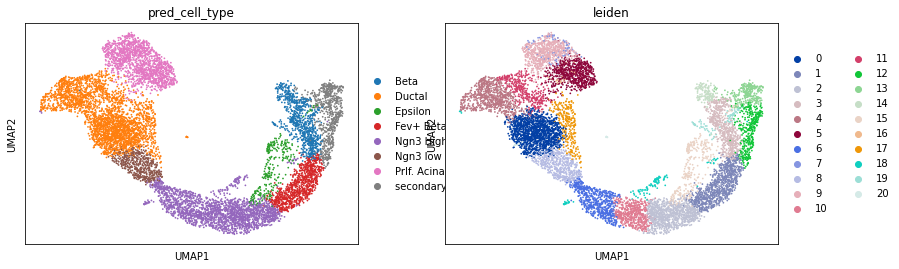

In [75]:
sc.pl.umap(adata_2022_145, color=["pred_cell_type", "leiden"])

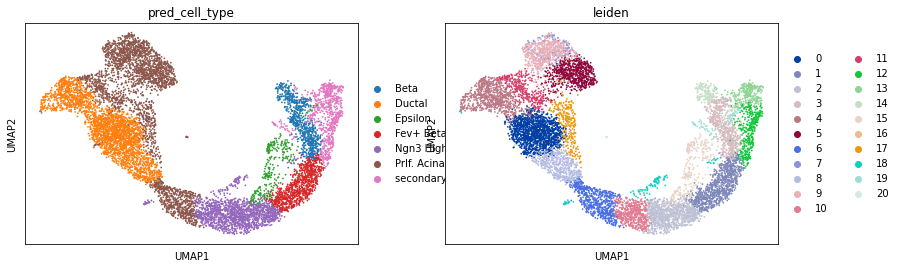

In [62]:
sc.pl.umap(adata_2022_145, color=["pred_cell_type", "leiden"])


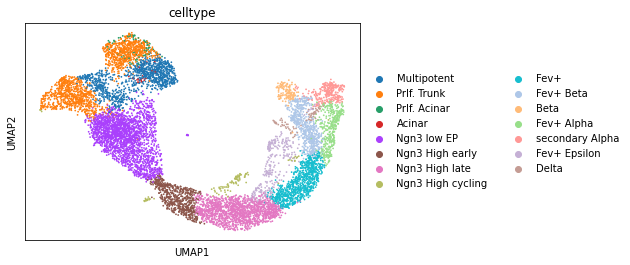

In [56]:
sc.pl.umap(adata_2022_145, color="celltype")

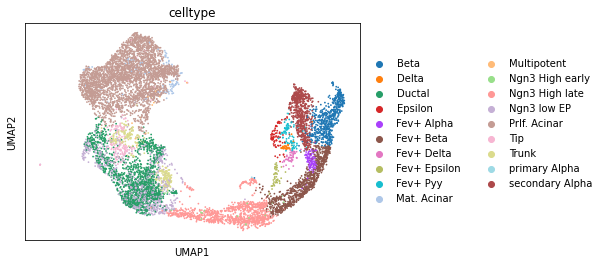

In [57]:
sc.pl.umap(adata_2019_145, color="celltype")

In [58]:
#adata_145[adata_145.obs["batch"]=="1"].obs["celltype"].map(trans_dict)

# E13.5